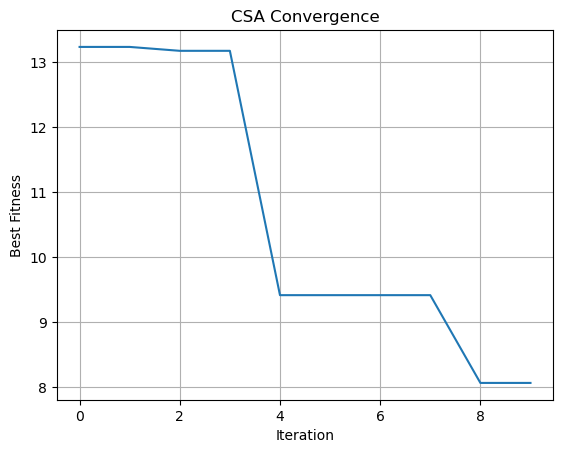

Best solution: [-2.00080103 -1.54819281  0.48644245  0.9648978   0.70555644]
Best fitness (sum of squares): 8.065569654663843


In [8]:
import numpy as np
import matplotlib.pyplot as plt  # Added for plotting

# 1. Initialization
def initialize_population(pop_size, dim, bound):
    return np.random.uniform(-bound, bound, size=(pop_size, dim))

# 2. Affinity (fitness) calculation
def calculate_affinity(pop):
    return np.sum(pop**2, axis=1)

# 3. Select top antibodies for cloning
def select_for_cloning(pop, affinity, num_select):
    idx = np.argsort(affinity)
    return pop[idx[:num_select]]

# 4. Clone antibodies
def clone_antibodies(selected, clone_factor):
    clones = []
    for rank, ab in enumerate(selected, start=1):
        n_clones = int(clone_factor * (len(selected) - rank + 1))
        clones.append(np.tile(ab, (n_clones, 1)))
    return np.vstack(clones)

# 5. Mutation step
def mutate_antibodies(clones, mutation_rate, bound):
    noise = np.random.randn(*clones.shape) * mutation_rate * bound
    mutated = clones + noise
    return np.clip(mutated, -bound, bound)

# 6. Select next generation
def select_next_generation(old_pop, mutated, pop_size):
    combined = np.vstack((old_pop, mutated))
    affinities = calculate_affinity(combined)
    idx = np.argsort(affinities)[:pop_size]
    return combined[idx]

# 7. CSA driver with convergence tracking
def clonal_selection_algorithm(
    pop_size=50,
    dim=5,
    bound=5.0,
    clone_factor=0.1,
    mutation_rate=0.2,
    num_iterations=10,
    select_fraction=0.2
):
    pop = initialize_population(pop_size, dim, bound)
    history = []

    for _ in range(num_iterations):
        aff = calculate_affinity(pop)
        history.append(np.min(aff))  # Track best fitness
        num_select = max(1, int(select_fraction * pop_size))
        selected = select_for_cloning(pop, aff, num_select)
        clones = clone_antibodies(selected, clone_factor)
        mutated = mutate_antibodies(clones, mutation_rate, bound)
        pop = select_next_generation(pop, mutated, pop_size)

    # Final best
    final_aff = calculate_affinity(pop)
    best_idx = np.argmin(final_aff)
    best_sol = pop[best_idx]

    # Plot convergence
    plt.plot(history)
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title("CSA Convergence")
    plt.grid(True)
    plt.show()

    return best_sol, final_aff[best_idx]

# Main
if __name__ == "__main__":
    best_sol, best_fit = clonal_selection_algorithm()
    print("Best solution:", best_sol)
    print("Best fitness (sum of squares):", best_fit)